# import pands modules

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Import dataset 

# !!!!! the datset contin more than 3GB dont run it on computer less than 32GB ram !!!!!!!!!!!!

In [2]:
df = pd.read_csv("data/data_4.csv") #CSE-CIC-IDS 2018 (02-20-2018)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


# replace space with "_"

In [4]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols

# filter HTTP and HTTPS traffic

In [5]:
query = df.query('Dst_Port == 80 or Dst_Port == 443')
df=query
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,172.31.69.25-60.191.38.77-80-42946-6,60.191.38.77,42946,172.31.69.25,80,6,20/02/2018 09:29:47,5222759,4,4,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
58,131.202.242.193-172.31.69.25-8837-80-6,131.202.242.193,8837,172.31.69.25,80,6,20/02/2018 10:11:19,5056542,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
59,131.202.242.193-172.31.69.25-8837-80-6,131.202.242.193,8837,172.31.69.25,80,6,20/02/2018 10:11:24,197,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
60,131.202.242.193-172.31.69.25-8836-80-6,131.202.242.193,8836,172.31.69.25,80,6,20/02/2018 10:11:18,5940703,7,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
61,131.202.242.193-172.31.69.25-8836-80-6,131.202.242.193,8836,172.31.69.25,80,6,20/02/2018 10:11:24,54,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,172.31.69.7-216.218.206.97-80-46940-6,216.218.206.97,46940,172.31.69.7,80,6,20/02/2018 11:19:48,18,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948537,172.31.69.7-184.105.247.199-80-34367-6,184.105.247.199,34367,172.31.69.7,80,6,20/02/2018 11:49:05,22,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948660,141.212.122.161-172.31.69.7-56517-443-6,141.212.122.161,56517,172.31.69.7,443,6,20/02/2018 08:40:33,3,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948700,172.31.69.7-71.6.202.198-80-50000-6,71.6.202.198,50000,172.31.69.7,80,6,20/02/2018 11:10:49,20,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


# Checking for null and INFINITE

In [6]:
#check for null
df.isnull().any()

Flow_ID      False
Src_IP       False
Src_Port     False
Dst_IP       False
Dst_Port     False
             ...  
Idle_Mean    False
Idle_Std     False
Idle_Max     False
Idle_Min     False
Label        False
Length: 84, dtype: bool

In [7]:
# counting infinity in a particular column name
inf=df.isin([np.inf, -np.inf])
inf

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
##df = df[np.isfinite(df).all(1)]
#drop null
df.dropna(how = 'all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,172.31.69.25-60.191.38.77-80-42946-6,60.191.38.77,42946,172.31.69.25,80,6,20/02/2018 09:29:47,5222759,4,4,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
58,131.202.242.193-172.31.69.25-8837-80-6,131.202.242.193,8837,172.31.69.25,80,6,20/02/2018 10:11:19,5056542,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
59,131.202.242.193-172.31.69.25-8837-80-6,131.202.242.193,8837,172.31.69.25,80,6,20/02/2018 10:11:24,197,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
60,131.202.242.193-172.31.69.25-8836-80-6,131.202.242.193,8836,172.31.69.25,80,6,20/02/2018 10:11:18,5940703,7,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
61,131.202.242.193-172.31.69.25-8836-80-6,131.202.242.193,8836,172.31.69.25,80,6,20/02/2018 10:11:24,54,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,172.31.69.7-216.218.206.97-80-46940-6,216.218.206.97,46940,172.31.69.7,80,6,20/02/2018 11:19:48,18,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948537,172.31.69.7-184.105.247.199-80-34367-6,184.105.247.199,34367,172.31.69.7,80,6,20/02/2018 11:49:05,22,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948660,141.212.122.161-172.31.69.7-56517-443-6,141.212.122.161,56517,172.31.69.7,443,6,20/02/2018 08:40:33,3,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948700,172.31.69.7-71.6.202.198-80-50000-6,71.6.202.198,50000,172.31.69.7,80,6,20/02/2018 11:10:49,20,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


# Checking Data type

In [9]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665877 entries, 37 to 7948728
Data columns (total 82 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow_ID            object 
 1   Src_IP             object 
 2   Src_Port           int64  
 3   Dst_IP             object 
 4   Dst_Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow_Duration      int64  
 8   Tot_Fwd_Pkts       int64  
 9   Tot_Bwd_Pkts       int64  
 10  TotLen_Fwd_Pkts    float64
 11  TotLen_Bwd_Pkts    float64
 12  Fwd_Pkt_Len_Max    float64
 13  Fwd_Pkt_Len_Min    float64
 14  Fwd_Pkt_Len_Mean   float64
 15  Fwd_Pkt_Len_Std    float64
 16  Bwd_Pkt_Len_Max    float64
 17  Bwd_Pkt_Len_Min    float64
 18  Bwd_Pkt_Len_Mean   float64
 19  Bwd_Pkt_Len_Std    float64
 20  Flow_IAT_Mean      float64
 21  Flow_IAT_Std       float64
 22  Flow_IAT_Max       float64
 23  Flow_IAT_Min       float64
 24  Fwd_IAT_T

# Drop all column contain object datatype

In [10]:
df = df.drop(columns=['Timestamp', 'Flow_ID', 'Src_IP', 'Dst_IP'])
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,42946,80,6,5222759,4,4,289.0,972.0,289.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
58,8837,80,6,5056542,4,4,281.0,509.0,281.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
59,8837,80,6,197,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
60,8836,80,6,5940703,7,6,907.0,1597.0,323.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
61,8836,80,6,54,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,46940,80,6,18,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948537,34367,80,6,22,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948660,56517,443,6,3,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948700,50000,80,6,20,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [11]:
daummy = pd.get_dummies(df['Label'])
daummy.head()

,Benign,DDoS attacks-LOIC-HTTP
37,1,0
58,1,0
59,1,0
60,1,0
61,1,0


In [12]:
#change values as
#benign = 0
#DDoS attacks-LOIC-HTTP = 1
daummy.head()
df.Label[df.Label=='Benign'] = 0
df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1

<ipython-input-12-af1df716f5f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label=='Benign'] = 0
<ipython-input-12-af1df716f5f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1


In [13]:
daummy = pd.get_dummies(df['Label'])
daummy.head()

,0,1
37,1,0
58,1,0
59,1,0
60,1,0
61,1,0


# date devision

In [14]:
bening_df = df[df['Label']==0][0:1332938]
malignant_df = df[df['Label']==1][0:2665876]

<AxesSubplot:xlabel='Flow_Duration', ylabel='Tot_Fwd_Pkts'>

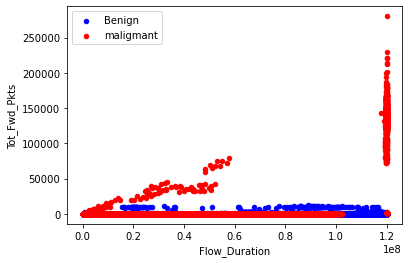

In [15]:
axes = bening_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='red', label='maligmant', ax=axes)

# Create Raw and label vaibles

In [16]:
#limiting number of rows in order to speed up the process
#first shuffel raws
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
number_of_data=15000# can chanhe in between 500- 2665877 
train_df = df [0:number_of_data]
train_df = train_df.astype("float64")
train_df 


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,55323.0,443.0,6.0,1296279.0,3.0,3.0,0.0,0.0,0.0,0.0,...,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49684.0,443.0,6.0,60108035.0,4.0,2.0,148.0,252.0,74.0,0.0,...,20.0,93055.0,0.0,93055.0,93055.0,59921443.0,0.0,59921443.0,59921443.0,0.0
2,62211.0,80.0,6.0,1338150.0,3.0,4.0,20.0,964.0,20.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53453.0,443.0,6.0,535881.0,9.0,6.0,520.0,2879.0,202.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64782.0,80.0,6.0,1132814.0,3.0,4.0,20.0,964.0,20.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51234.0,80.0,6.0,103.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,54187.0,443.0,6.0,10325331.0,7.0,9.0,1590.0,4983.0,1271.0,0.0,...,20.0,325789.0,0.0,325789.0,325789.0,9999542.0,0.0,9999542.0,9999542.0,0.0
14997,52076.0,443.0,6.0,1803173.0,7.0,11.0,327.0,7030.0,201.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14998,58061.0,80.0,6.0,19909592.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,19900000.0,0.0,19900000.0,19900000.0,1.0


In [17]:
##Removing unwanted columns 
df.columns 

feature_df = train_df[['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt',
       'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts',
       'Subflow_Bwd_Byts', 'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts',
       'Fwd_Act_Data_Pkts', 'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std',
       'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max',
       'Idle_Min']]


#df 2665877 rows and 80 columns,
#pick 79 columns
# pick 15000 rows
#independent var
raw = np.asarray(feature_df)
#dependent varinable
label= np.asarray(train_df['Label'])


In [18]:
#np.all(np.isfinite(x))
#np.all(np.isfinite(y))

In [19]:
#y = y[np.isfinite(df).all(1)]

In [20]:
#df.replace([np.inf, -np.inf], np.nan)

#df.dropna(inplace=True)

In [21]:
#y = y.reset_index()
raw

array([[5.5323000e+04, 4.4300000e+02, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.9684000e+04, 4.4300000e+02, 6.0000000e+00, ..., 0.0000000e+00,
        5.9921443e+07, 5.9921443e+07],
       [6.2211000e+04, 8.0000000e+01, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.2076000e+04, 4.4300000e+02, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.8061000e+04, 8.0000000e+01, 6.0000000e+00, ..., 0.0000000e+00,
        1.9900000e+07, 1.9900000e+07],
       [5.3249000e+04, 8.0000000e+01, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

# Data Devision

In [22]:
## import deviding model
from sklearn.model_selection import train_test_split
raw_train,raw_test,label_train,label_test=train_test_split(raw,label, test_size=0.2, random_state=4)


# SVM Model

In [23]:
##test usign knowladge and feeling of testing data 
from sklearn import svm 
model=svm.SVC(kernel="rbf", C=3, coef0=0.001, degree =10, gamma='scale')
model.fit(raw_train,label_train)
acc = model.score(raw_test, label_test)
print("Anomaly based IDs Accuracy with SVM: {:.2f}%".format(acc * 100))


Anomaly based IDs Accuracy with SVM: 88.40%


In [24]:
##use grid function to find best matching parameters
#from sklearn.model_selection import GridSearchCV 
#param= {'kernel':('linear','poly','rbf','sigmoid'),
#        'C':[2,3,1],
#        'degree':[3,100],
#        'coef0':[0.001,1000,0.5],
#        'gamma': ('auto', 'scale')
#       }
#SVModel=svm.SVC()
#GridS = GridSearchCV(SVModel, param, cv=5)
#GridS.fit(raw_test, label_test)
#GridS.best_params_

In [25]:
##implemet and optimize wtih grid serch 
#model=svm.SVC(kernel="linear", C=2, coef0=0.001, degree =3, gamma='auto')
#model.fit(raw_train,label_train)
#acc = model.score(raw_test, label_test)
#print("Anomaly based IDs Accuracy with SVM: {:.2f}%".format(acc * 100))

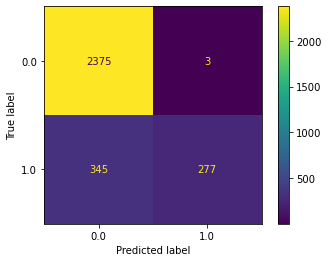

In [26]:
#plot_confusion_matrix(estimator, X, y_true) 
from sklearn.metrics import plot_confusion_matrix   
plot_confusion_matrix(model, raw_test, label_test) 

In [27]:
## Generate classification report 
from sklearn.metrics import classification_report
svm_prediction = model.predict(raw_test)
print( '\nClasification report:\n', classification_report(label_test, svm_prediction))


Clasification report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2378
         1.0       0.99      0.45      0.61       622

    accuracy                           0.88      3000
   macro avg       0.93      0.72      0.77      3000
weighted avg       0.90      0.88      0.87      3000



# Long Short Term Memory (LSTM)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [29]:
# reshape input to be [samples, time steps, features]
raw_train = np.reshape(raw_train, (raw_train.shape[0], 1, raw_train.shape[1]))
raw_test = np.reshape(raw_test, (raw_test.shape[0], 1,raw_test.shape[1]))


In [30]:
raw_train.shape

(12000, 1, 77)

In [31]:
# not working execute with error 
####look_back = 1
###model = Sequential()
###model.add(LSTM(4, input_shape=(1, look_back)))
###model.add(Dense(1))
###model.compile(loss='mean_squared_error', optimizer='adam')
##model.fit(raw_train, label_train, epochs=100, batch_size=1, verbose=2)
####model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
#####model.fit(df, target, nb_epoch=10000, batch_size=1, verbose=2,validation_data=(x_test, y_test))

In [32]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
history= regressor.fit(raw_train, label_train, epochs=15, batch_size=1, verbose=2,validation_data=(raw_test, label_test))
history 

Epoch 1/15
12000/12000 - 12s - loss: 0.1224 - accuracy: 0.9253 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 2/15
12000/12000 - 11s - loss: 0.0868 - accuracy: 0.9646 - val_loss: 0.0530 - val_accuracy: 0.9850
Epoch 3/15
12000/12000 - 11s - loss: 0.0703 - accuracy: 0.9765 - val_loss: 0.0423 - val_accuracy: 0.9897
Epoch 4/15
12000/12000 - 11s - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0441 - val_accuracy: 0.9893
Epoch 5/15
12000/12000 - 11s - loss: 0.0525 - accuracy: 0.9808 - val_loss: 0.0234 - val_accuracy: 0.9897
Epoch 6/15
12000/12000 - 11s - loss: 0.0506 - accuracy: 0.9804 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 7/15
12000/12000 - 11s - loss: 0.0493 - accuracy: 0.9812 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 8/15
12000/12000 - 11s - loss: 0.0468 - accuracy: 0.9817 - val_loss: 0.0258 - val_accuracy: 0.9910
Epoch 9/15
12000/12000 - 11s - loss: 0.0440 - accuracy: 0.9839 - val_loss: 0.0237 - val_accuracy: 0.9910
Epoch 10/15
12000/12000 - 11s - loss: 0.0444 - accuracy

In [33]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 1, 50)                25600     
_________________________________________________________________
dropout (Dropout)            (1, 1, 50)                0         
_________________________________________________________________
lstm_1 (LSTM)                (1, 50)                   20200     
_________________________________________________________________
dropout_1 (Dropout)          (1, 50)                   0         
_________________________________________________________________
dense (Dense)                (1, 1)                    51        
Total params: 45,851
Trainable params: 45,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
#results = regressor.predict(raw_test)
#results

array([[4.1138429e-02],
       [8.8503981e-01],
       [1.0651705e+00],
       ...,
       [1.0806975e-03],
       [1.7086133e-04],
       [2.0779710e-04]], dtype=float32)

In [35]:
#results=np.arange(0,len(results),1)
#results.shape

(3000,)

In [36]:
#label_test.shape

(3000,)

In [39]:
#plt.scatter(range(20),results[:,0],c='r')
#plt.scatter(range(20),label_test[:,0],c='r')
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

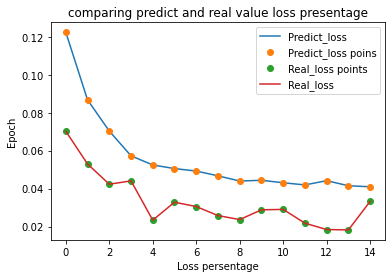

In [38]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['loss'], 'o')
plt.plot(history.history['val_loss'], 'o')
plt.plot(history.history['val_loss'])
plt.title('comparing predict and real value loss presentage')
plt.xlabel('Loss persentage')
plt.ylabel('Epoch')
plt.legend(['Predict_loss','Predict_loss poins','Real_loss points', 'Real_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

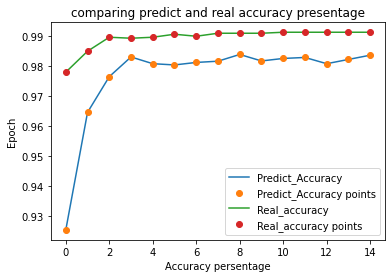

In [40]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('comparing predict and real accuracy presentage')
plt.xlabel('Accuracy persentage')
plt.ylabel('Epoch')
plt.legend(['Predict_Accuracy','Predict_Accuracy points', 'Real_accuracy','Real_accuracy points'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

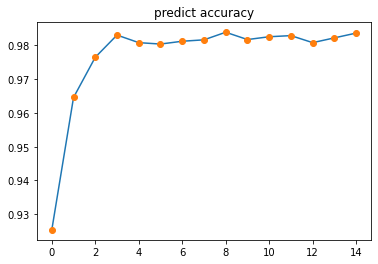

In [41]:
#accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.title('predict accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

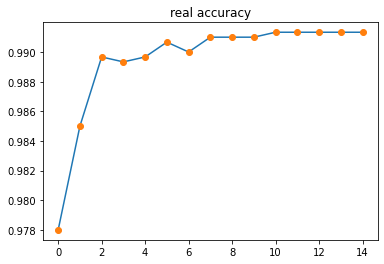

In [42]:
#val_accuracy Plot
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('real accuracy')
plt.show